In [16]:
# Evaluate a univariate persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [17]:
# Load data
train = read_csv('2000_2021_Brazilian_North_Region_hourly_MWmed_hydroelectric_power_series_train.csv',
                     header=0, index_col=0, parse_dates=True, squeeze=True)
test = read_csv('2000_2021_Brazilian_North_Region_hourly_MWmed_hydroelectric_power_series_test.csv',
                     header=0, index_col=0, parse_dates=True, squeeze=True)

In [18]:
# Prepare data
test = test.values
train = [x for x in train]

In [19]:
# Walk-forward validation
predictions = list()

In [20]:
for i in range(len(test)):
    # Predict
    yhat = train[-1]
    # Store forecast in list of predictions
    predictions.append(yhat)
    # Add actual observation to train for the next loop
    obs = test[i]
    train.append(obs)
    #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


RMSE: 395.686


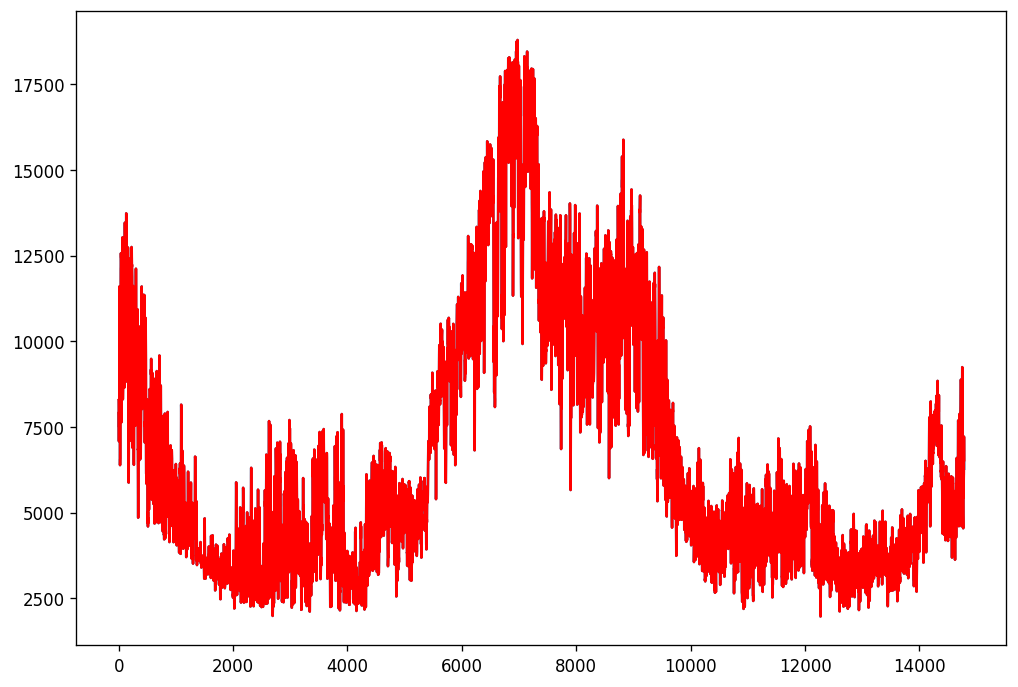

In [22]:
# Report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# Plot predicted vs expected values
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()